In [21]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh40/inc90/BHOSS_CODE"
data = "Rhigh_40_incl_90_IMAGE_GRMHD_HAMR3D_SANEA93M_133.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 1
time: 9934.173457 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: -0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.00305034
Total flux = 2.020070 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9497.623989 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 9.41275e-08 0.00360312
Total flux = 2.002618 Jy at 230 GHz
165:41:02.382 - Start Program


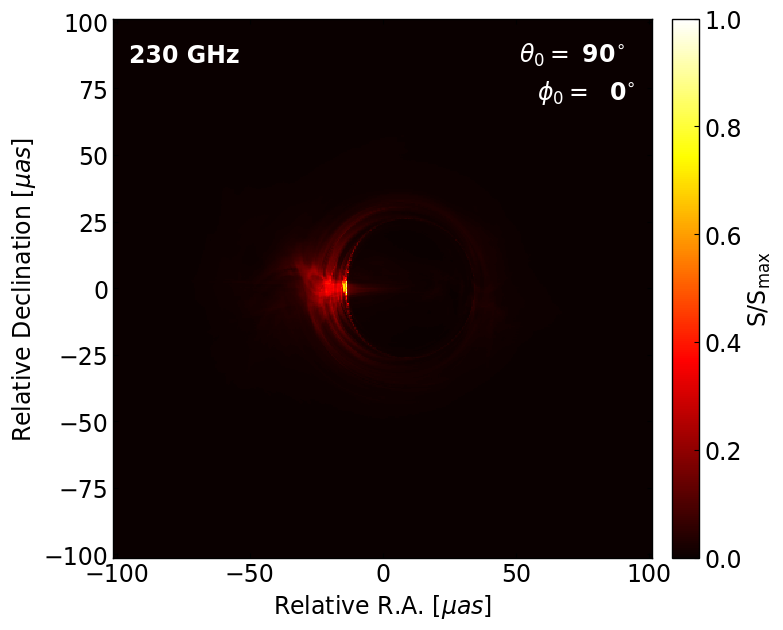

In [16]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [2]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,inclination,model_name, ifreq=2):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==40) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rhigh_%d_incl_%d_IMAGE_GRMHD_HAMR3D_%s_%d.dat" \
        %(Rhigh,inclination,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

## Rhigh = 1

In [ ]:
ind,time,z_tot,dscale = bhoss_avg(1, 10, "SANEA93M", ifreq=2)

In [ ]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [ ]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [ ]:
ind,time,z_tot,dscale = bhoss_avg(1, 50, "SANEA93M", ifreq=2)

In [ ]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [ ]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [ ]:
ind,time,z_tot,dscale = bhoss_avg(1, 90, "SANEA93M", ifreq=2)

In [ ]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [ ]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

## Rhigh = 40

In [2]:
ind,time,z_tot,dscale = bhoss_avg(40, 10, "SANEA93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh40/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
132, flux: 1.988729 at 9925.528924
133, flux: 1.934763 at 9934.173457
134, flux: 1.877840 at 9942.822006
135, flux: 1.762636 at 9955.791871
136, flux: 1.734477 at 9964.438576
137, flux: 1.750537 at 9973.082137
138, flux: 1.794124 at 9986.049828
139, flux: 1.867538 at 9994.698523
140, flux: 1.938899 at 10003.343218
141, flux: 2.041863 at 10016.310270
142, flux: 2.092963 at 10024.962133
143, flux: 2.021288 at 10033.615429
144, flux: 1.931996 at 10046.591838
145, flux: 1.913971 at 10055.242073
146, flux: 1.894603 at 10063.900253
147, flux: 1.914104 at 10076.889057
148, flux: 1.942393 at 10085.542268
149, flux: 2.023816 at 10094.188939
150, flux: 2.037585 at 10102.838018
151, flux: 2.003379 at 10115.820650
152, flux: 1.992430 at 10124.473785
153, flux: 2.030593 at 10133.126518
154, flux: 2.066841 at 10146.100336
155, flux: 2.077087 at 10154.746542


In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.985304 Jy, the density scale = 8.830000e-14


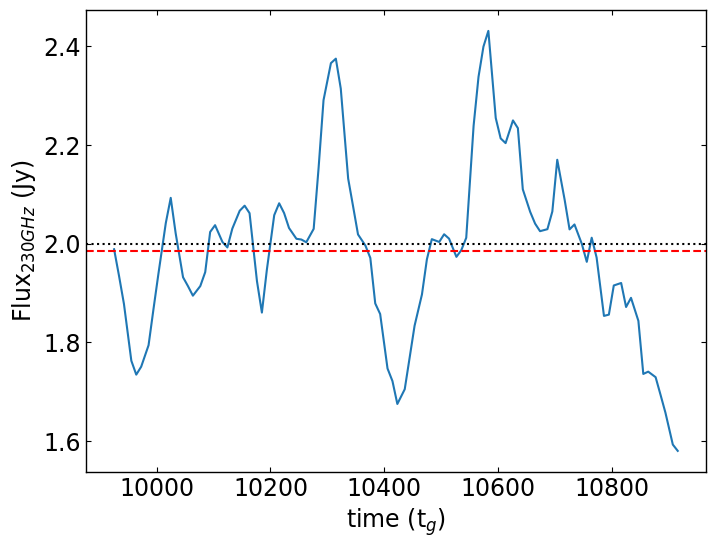

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [ ]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

In [3]:
ind,time,z_tot,dscale = bhoss_avg(40, 50, "SANEA93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh40/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
132, flux: 1.883278 at 9925.528924
133, flux: 1.837504 at 9934.173457
134, flux: 1.808466 at 9942.822006
135, flux: 1.752241 at 9955.791871
136, flux: 1.752490 at 9964.438576
137, flux: 1.821344 at 9973.082137
138, flux: 1.958487 at 9986.049828
139, flux: 2.062618 at 9994.698523
140, flux: 2.113437 at 10003.343218
141, flux: 2.159527 at 10016.310270
142, flux: 2.164609 at 10024.962133
143, flux: 2.089512 at 10033.615429
144, flux: 1.990134 at 10046.591838
145, flux: 1.957205 at 10055.242073
146, flux: 1.952899 at 10063.900253
147, flux: 1.999701 at 10076.889057
148, flux: 2.054234 at 10085.542268
149, flux: 2.122207 at 10094.188939
150, flux: 2.193716 at 10102.838018
151, flux: 2.241812 at 10115.820650
152, flux: 2.247362 at 10124.473785
153, flux: 2.293129 at 10133.126518
154, flux: 2.352312 at 10146.100336
155, flux: 2.374258 at 10154.746542


In [4]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [5]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.973388 Jy, the density scale = 8.200000e-14


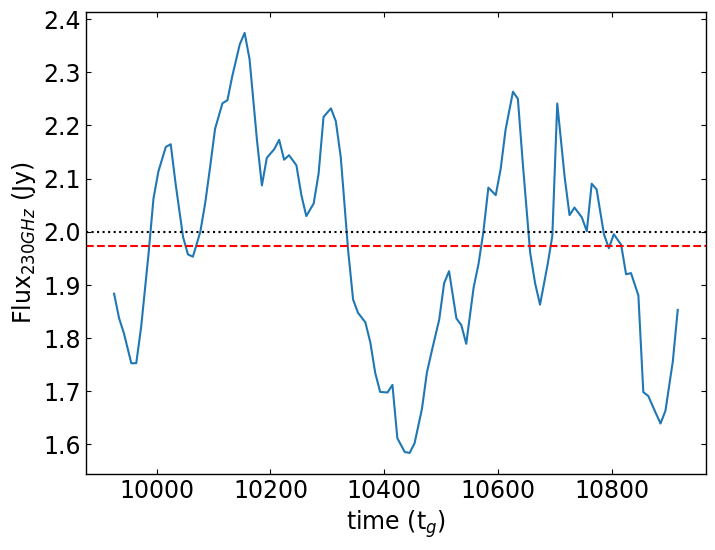

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [7]:
ind,time,z_tot,dscale = bhoss_avg(40, 90, "SANEA93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh40/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
132, flux: 2.086016 at 9925.528924
133, flux: 2.020070 at 9934.173457
134, flux: 1.940297 at 9942.822006
135, flux: 1.864823 at 9955.791871
136, flux: 1.916590 at 9964.438576
137, flux: 2.041472 at 9973.082137
138, flux: 2.176418 at 9986.049828
139, flux: 2.223657 at 9994.698523
140, flux: 2.260842 at 10003.343218
141, flux: 2.281608 at 10016.310270
142, flux: 2.269366 at 10024.962133
143, flux: 2.207912 at 10033.615429
144, flux: 2.098327 at 10046.591838
145, flux: 2.030782 at 10055.242073
146, flux: 1.985861 at 10063.900253
147, flux: 2.028196 at 10076.889057
148, flux: 2.106260 at 10085.542268
149, flux: 2.191909 at 10094.188939
150, flux: 2.307379 at 10102.838018
151, flux: 2.356921 at 10115.820650
152, flux: 2.351410 at 10124.473785
153, flux: 2.383881 at 10133.126518
154, flux: 2.459164 at 10146.100336
155, flux: 2.554318 at 10154.746542


In [8]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [9]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.012497 Jy, the density scale = 9.200000e-14


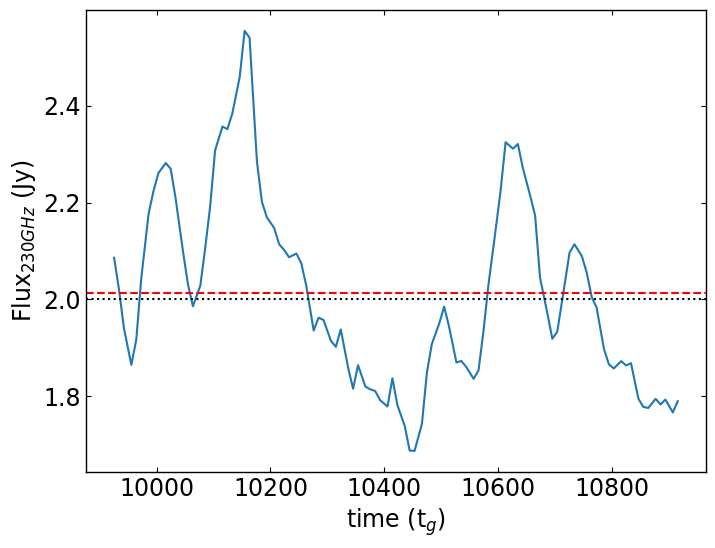

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

## Rhigh = 160

In [11]:
ind,time,z_tot,dscale = bhoss_avg(160, 10, "SANEA93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh160/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
132, flux: 2.096754 at 9925.528924
133, flux: 1.985162 at 9934.173457
134, flux: 1.892292 at 9942.822006
135, flux: 1.738769 at 9955.791871
136, flux: 1.736206 at 9964.438576
137, flux: 1.790893 at 9973.082137
138, flux: 1.848365 at 9986.049828
139, flux: 1.929986 at 9994.698523
140, flux: 2.066704 at 10003.343218
141, flux: 2.206491 at 10016.310270
142, flux: 2.213132 at 10024.962133
143, flux: 2.183432 at 10033.615429
144, flux: 2.093057 at 10046.591838
145, flux: 2.065523 at 10055.242073
146, flux: 2.048210 at 10063.900253
147, flux: 2.090375 at 10076.889057
148, flux: 2.112072 at 10085.542268
149, flux: 2.225359 at 10094.188939
150, flux: 2.229566 at 10102.838018
151, flux: 2.168423 at 10115.820650
152, flux: 2.128538 at 10124.473785
153, flux: 2.198022 at 10133.126518
154, flux: 2.206602 at 10146.100336
155, flux: 2.258737 at 10154.746542

In [12]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [13]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.043410 Jy, the density scale = 2.100000e-13


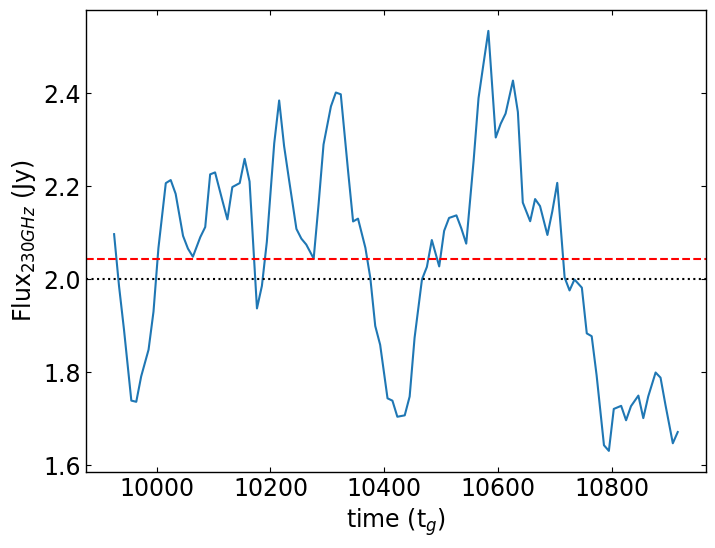

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [15]:
ind,time,z_tot,dscale = bhoss_avg(160, 50, "SANEA93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh160/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
132, flux: 2.002254 at 9925.528924
133, flux: 1.963515 at 9934.173457
134, flux: 1.908170 at 9942.822006
135, flux: 1.824650 at 9955.791871
136, flux: 1.886907 at 9964.438576
137, flux: 2.013274 at 9973.082137
138, flux: 2.154717 at 9986.049828
139, flux: 2.224061 at 9994.698523
140, flux: 2.307766 at 10003.343218
141, flux: 2.362099 at 10016.310270
142, flux: 2.364916 at 10024.962133
143, flux: 2.324247 at 10033.615429
144, flux: 2.255878 at 10046.591838
145, flux: 2.236988 at 10055.242073
146, flux: 2.256684 at 10063.900253
147, flux: 2.306114 at 10076.889057
148, flux: 2.367130 at 10085.542268
149, flux: 2.483261 at 10094.188939
150, flux: 2.550269 at 10102.838018
151, flux: 2.483876 at 10115.820650
152, flux: 2.458967 at 10124.473785
153, flux: 2.519771 at 10133.126518
154, flux: 2.614819 at 10146.100336
155, flux: 2.717613 at 10154.746542

In [16]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [17]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.083091 Jy, the density scale = 1.950000e-13


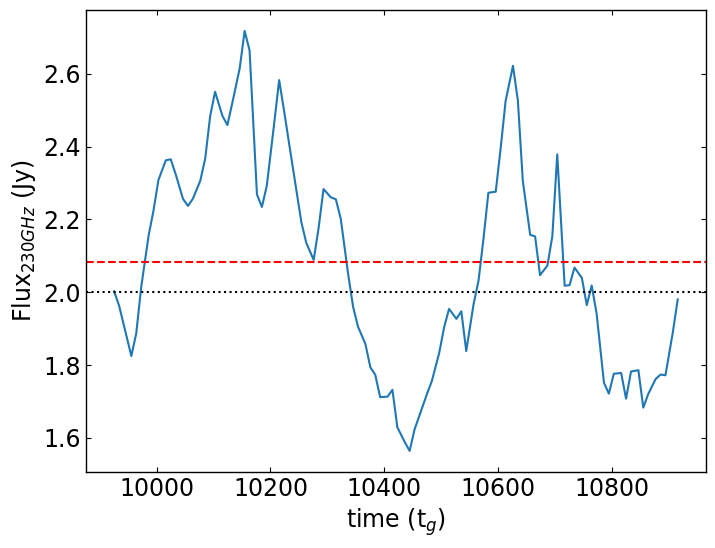

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [19]:
ind,time,z_tot,dscale = bhoss_avg(160, 90, "SANEA93M", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh160/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
132, flux: 2.199881 at 9925.528924
133, flux: 2.110494 at 9934.173457
134, flux: 2.021739 at 9942.822006
135, flux: 1.952641 at 9955.791871
136, flux: 2.107279 at 9964.438576
137, flux: 2.345033 at 9973.082137
138, flux: 2.472127 at 9986.049828
139, flux: 2.448658 at 9994.698523
140, flux: 2.432611 at 10003.343218
141, flux: 2.375773 at 10016.310270
142, flux: 2.361821 at 10024.962133
143, flux: 2.338268 at 10033.615429
144, flux: 2.180690 at 10046.591838
145, flux: 2.124021 at 10055.242073
146, flux: 2.062737 at 10063.900253
147, flux: 2.129727 at 10076.889057
148, flux: 2.269141 at 10085.542268
149, flux: 2.417533 at 10094.188939
150, flux: 2.572151 at 10102.838018
151, flux: 2.581675 at 10115.820650
152, flux: 2.618793 at 10124.473785
153, flux: 2.719779 at 10133.126518
154, flux: 2.810869 at 10146.100336
155, flux: 2.904744 at 10154.746542

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.049520 Jy, the density scale = 2.200000e-13


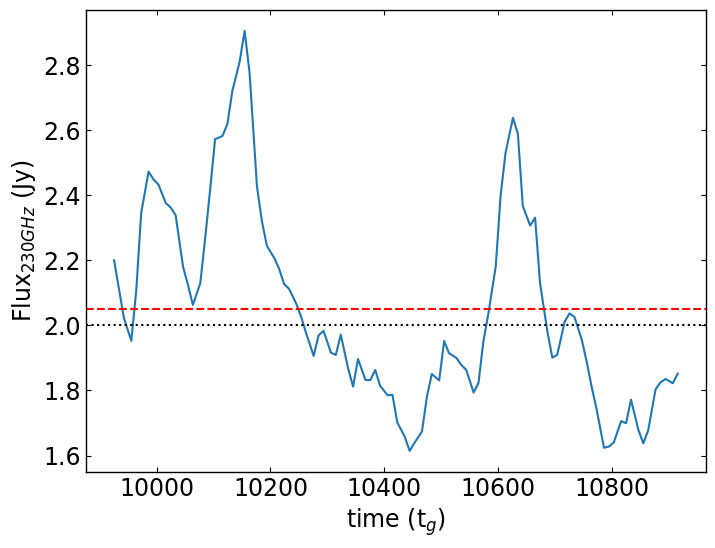

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))